In [1]:
#Visualizing correlation tables.

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import nan as NA

In [3]:
df = pd.read_csv('Forbes2000.csv', nrows=30, index_col=0)
df

,rank,name,country,category,sales,profits,assets,marketvalue
1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54
6,6,Bank of America,United States,Banking,49.01,10.81,736.45,117.55
7,7,HSBC Group,United Kingdom,Banking,44.33,6.66,757.60,177.96
8,8,Toyota Motor,Japan,Consumer durables,135.82,7.99,171.71,115.40
9,9,Fannie Mae,United States,Diversified financials,53.13,6.48,1019.17,76.84
10,10,Wal-Mart Stores,United States,Retailing,256.33,9.05,104.91,243.74


In [4]:
# Selecting one country by name as its index.
gb = df.groupby("country")
united_kingdom = gb.get_group("United Kingdom").set_index('name')
united_kingdom

,rank,country,category,sales,profits,assets,marketvalue
name,,,,,,,
BP,5,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54
HSBC Group,7,United Kingdom,Banking,44.33,6.66,757.60,177.96
Royal Bank of Scotland,19,United Kingdom,Banking,35.65,4.95,663.45,90.21
Barclays,27,United Kingdom,Banking,33.69,4.90,791.54,61.33


In [5]:
# Selecting another country
france = gb.get_group("France").set_index('name')
france

,rank,country,category,sales,profits,assets,marketvalue
name,,,,,,,
Total,17,France,Oil & gas operations,131.64,8.84,87.84,116.64
BNP Paribas,18,France,Banking,47.74,4.73,745.09,59.29


In [6]:
# Basic statistics about the united_kingdom's dataframe.
united_kingdom.describe()

,rank,sales,profits,assets,marketvalue
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,14.500000,86.560000,6.695000,597.540000,125.760000
std,10.376255,97.449744,2.519848,285.174878,58.942898
min,5.000000,33.690000,4.900000,177.570000,61.330000
25%,6.500000,35.160000,4.937500,541.980000,82.990000
50%,13.000000,39.990000,5.805000,710.525000,131.875000
75%,21.000000,91.390000,7.562500,766.085000,174.645000
max,27.000000,232.570000,10.270000,791.540000,177.960000


In [7]:
# Basic statistics about the france's dataframe.
france.describe()

,rank,sales,profits,assets,marketvalue
count,2.000000,2.000000,2.000000,2.000000,2.000000
mean,17.500000,89.690000,6.785000,416.465000,87.965000
std,0.707107,59.326259,2.906209,464.745932,40.552574
min,17.000000,47.740000,4.730000,87.840000,59.290000
25%,17.250000,68.715000,5.757500,252.152500,73.627500
50%,17.500000,89.690000,6.785000,416.465000,87.965000
75%,17.750000,110.665000,7.812500,580.777500,102.302500
max,18.000000,131.640000,8.840000,745.090000,116.640000


In [8]:
# Correlation of the whole dataframe.
# Replacing all instances of 0 for NAN.
df.replace(0, np.NAN).dropna(axis=1).corr()

,rank,sales,profits,assets,marketvalue
rank,1.000000,-0.305147,-0.668235,-0.308350,-0.595729
sales,-0.305147,1.000000,0.423953,-0.461601,0.354148
profits,-0.668235,0.423953,1.000000,0.060933,0.696713
assets,-0.308350,-0.461601,0.060933,1.000000,-0.139405
marketvalue,-0.595729,0.354148,0.696713,-0.139405,1.000000


In [9]:
# United_Kingdom's Correlation Table:
united_kingdom_corr = united_kingdom.corr()
united_kingdom_corr

,rank,sales,profits,assets,marketvalue
rank,1.000000,-0.646233,-0.815785,0.620792,-0.986887
sales,-0.646233,1.000000,0.959993,-0.979858,0.579635
profits,-0.815785,0.959993,1.000000,-0.913928,0.778024
assets,0.620792,-0.979858,-0.913928,1.000000,-0.526573
marketvalue,-0.986887,0.579635,0.778024,-0.526573,1.000000


In [10]:
# Visualizing United Kingdom's Correlation Table:

In [11]:
import matplotlib.pyplot as plt

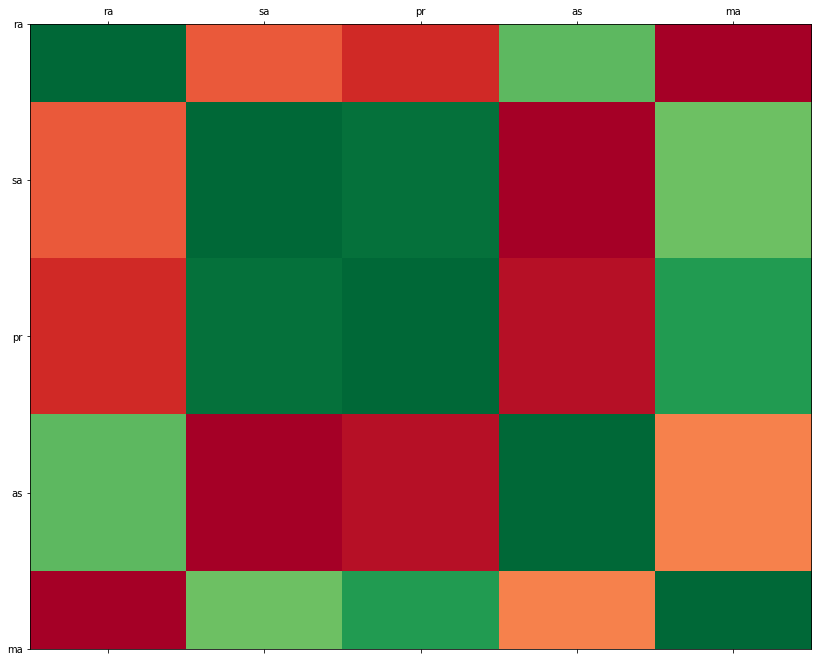

In [12]:
labels = [c[:2] for c in united_kingdom_corr.columns]

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)

ax.matshow(united_kingdom_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()

In [13]:
# France's Correlation Table:
france.corr()

,rank,sales,profits,assets,marketvalue
rank,1.0,-1.0,-1.0,1.0,-1.0
sales,-1.0,1.0,1.0,-1.0,1.0
profits,-1.0,1.0,1.0,-1.0,1.0
assets,1.0,-1.0,-1.0,1.0,-1.0
marketvalue,-1.0,1.0,1.0,-1.0,1.0


In [14]:
# Visualizing France's Correlation Table:

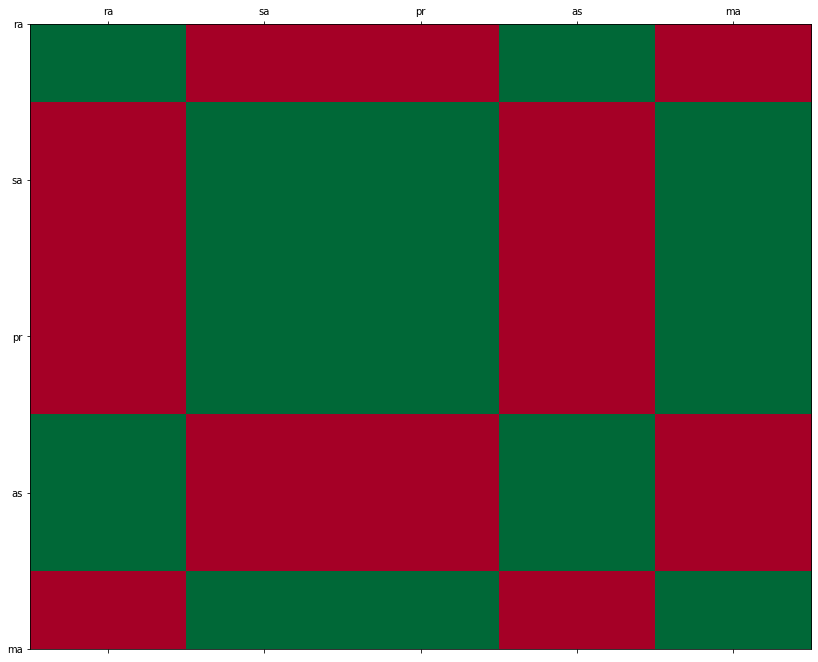

In [15]:
labels = [c[:2] for c in france.corr().columns]

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)

ax.matshow(france.corr(), cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()